### It's some Neural Network tests for WSDM churn prediction competition

In [1]:
import pandas as pd

train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')

* Shuffled the train data

In [2]:
from sklearn.utils import shuffle
train = shuffle(train)

* First tried layer [32,16,1]

In [29]:
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LambdaCallback
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.core import Dropout
from keras import regularizers
from keras.models import Model, load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras import models
from keras import layers

cols = [c for c in train.columns if c not in ['is_churn','msno']]

X_train = StandardScaler().fit_transform(train[cols].as_matrix())
y_train = train['is_churn'].as_matrix()
X_test = StandardScaler().fit_transform(test[cols].as_matrix())

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(59,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=1024,#512, 
                    validation_split=0.1, verbose=1)

Train on 973971 samples, validate on 108219 samples
Epoch 1/10
973971/973971 [==============================] - 7s 7us/step - loss: 0.2769 - acc: 0.9036 - val_loss: 0.2551 - val_acc: 0.9094
Epoch 2/10
973971/973971 [==============================] - 5s 5us/step - loss: 0.2506 - acc: 0.9099 - val_loss: 0.2470 - val_acc: 0.9103
Epoch 3/10
973971/973971 [==============================] - 6s 6us/step - loss: 0.2446 - acc: 0.9106 - val_loss: 0.2424 - val_acc: 0.9111
Epoch 4/10
973971/973971 [==============================] - 5s 5us/step - loss: 0.2406 - acc: 0.9112 - val_loss: 0.2392 - val_acc: 0.9113
Epoch 5/10
973971/973971 [==============================] - 5s 5us/step - loss: 0.2378 - acc: 0.9118 - val_loss: 0.2364 - val_acc: 0.9125
Epoch 6/10
973971/973971 [==============================] - 5s 5us/step - loss: 0.2359 - acc: 0.9127 - val_loss: 0.2355 - val_acc: 0.9130
Epoch 7/10
973971/973971 [==============================] - 5s 5us/step - loss: 0.2344 - acc: 0.9133 - val_loss: 0.2329 

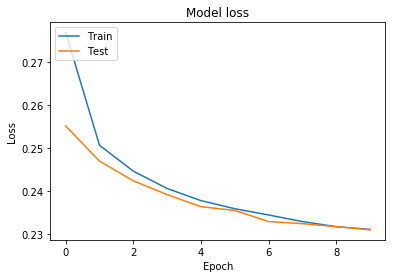

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* Second tried layer [512, 256 ,128, 1]

In [26]:
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LambdaCallback
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.core import Dropout
from keras import regularizers
from keras.models import Model, load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras import models
from keras import layers

cols = [c for c in train.columns if c not in ['is_churn','msno']]

X_train = StandardScaler().fit_transform(train[cols].as_matrix())
y_train = train['is_churn'].as_matrix()
X_test = StandardScaler().fit_transform(test[cols].as_matrix())

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(59,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=1024,#512, 
                    validation_split=0.1, verbose=1)

Train on 973971 samples, validate on 108219 samples
Epoch 1/10
973971/973971 [==============================] - 29s 30us/step - loss: 0.2500 - acc: 0.9096 - val_loss: 0.2340 - val_acc: 0.9131
Epoch 2/10
973971/973971 [==============================] - 30s 31us/step - loss: 0.2316 - acc: 0.9152 - val_loss: 0.2258 - val_acc: 0.9159
Epoch 3/10
973971/973971 [==============================] - 28s 29us/step - loss: 0.2260 - acc: 0.9170 - val_loss: 0.2203 - val_acc: 0.9205
Epoch 4/10
973971/973971 [==============================] - 30s 31us/step - loss: 0.2198 - acc: 0.9197 - val_loss: 0.2171 - val_acc: 0.9213
Epoch 5/10
973971/973971 [==============================] - 33s 33us/step - loss: 0.2155 - acc: 0.9217 - val_loss: 0.2139 - val_acc: 0.9223
Epoch 6/10
973971/973971 [==============================] - 27s 28us/step - loss: 0.2131 - acc: 0.9226 - val_loss: 0.2123 - val_acc: 0.9229
Epoch 7/10
973971/973971 [==============================] - 27s 28us/step - loss: 0.2117 - acc: 0.9232 - val

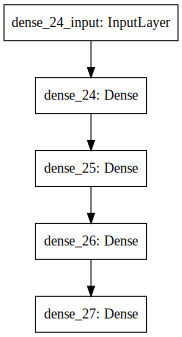

In [27]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

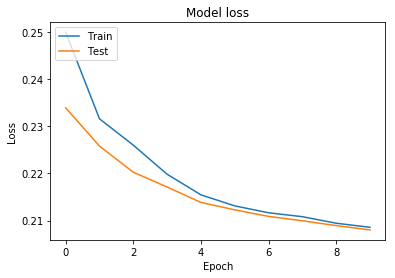

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

* And we added some drop out for this model, and add some kind of normalizations.

In [24]:
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LambdaCallback
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.core import Dropout
from keras import regularizers
from keras.models import Model, load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPooling1D
from sklearn.preprocessing import StandardScaler,MinMaxScaler

cols = [c for c in train.columns if c not in ['is_churn','msno']]

X_train = StandardScaler().fit_transform(train[cols].as_matrix())
y_train = train['is_churn'].as_matrix()
X_test = StandardScaler().fit_transform(test[cols].as_matrix())

lsize = 256
model = Sequential()
model.add(Dense(lsize, input_dim=int(X_train.shape[1]),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(int(lsize/2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(int(lsize/4),kernel_regularizer=regularizers.l2(0.1), activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               15360     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
__________

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 512,#512, 
                    validation_split=0.1, verbose=1)

Train on 973971 samples, validate on 108219 samples
Epoch 1/20
973971/973971 [==============================] - 27s 27us/step - loss: 0.5091 - acc: 0.9058 - val_loss: 0.2470 - val_acc: 0.9113
Epoch 2/20
973971/973971 [==============================] - 25s 25us/step - loss: 0.2471 - acc: 0.9111 - val_loss: 0.2448 - val_acc: 0.9119
Epoch 3/20
973971/973971 [==============================] - 25s 26us/step - loss: 0.2411 - acc: 0.9130 - val_loss: 0.2493 - val_acc: 0.9106
Epoch 4/20
973971/973971 [==============================] - 24s 25us/step - loss: 0.2363 - acc: 0.9153 - val_loss: 0.2512 - val_acc: 0.9077
Epoch 5/20
973971/973971 [==============================] - 24s 25us/step - loss: 0.2342 - acc: 0.9159 - val_loss: 0.2518 - val_acc: 0.9092
Epoch 6/20
973971/973971 [==============================] - 25s 25us/step - loss: 0.2335 - acc: 0.9163 - val_loss: 0.2434 - val_acc: 0.9127
Epoch 7/20
973971/973971 [==============================] - 25s 25us/step - loss: 0.2316 - acc: 0.9170 - val

KeyboardInterrupt: 

In [52]:
X_test = StandardScaler().fit_transform(test[cols].as_matrix())
predictions = model.predict(X_test)

In [54]:
sample_submission = pd.read_csv('sample_submission_v2.csv')
sample_submission['is_churn'] = predictions
sample_submission.to_csv('submission_test.csv',index=False)